In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'coronahack-chest-xraydataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F562468%2F1022626%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240908%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240908T184643Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D659df4338548ded628fa04603f97946d292bdd0e4c6cd351da519ae51ff15dfd9da346c9f951197daad9b49e9bc575b990eff65b3dbaf254a2fda05fd1828855de2e43a33f649bf4c50d259f05f0f57ed2514b271a07b5b3f3763e97308602e0bdb625697f5ba5cbf1631a53dbcdf39ca8e26a8aab6838d0ee4500f4cfd0e7e1933d11df2ff3cd015e461a4626f74bddb14f0ee461d22a69b6a63ffb312d9b67b207ecfb7ad104f59f905e00f00f158c4def789688a1f9fe1e30546354ab351428cc6a20a37ad6847f15f520c31689287a4450759d99001f74a859b6dd5b9b9417ea937b154a160b7e378fd4b42aaa79720b54915b0e57dae9af7dc87e0062fa,model_image_classification/pytorch/default/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F92021%2F109873%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240908%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240908T184643Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D854126afa66b343012854dd8293c66dcb5f65e319df4df338a20bf8e4631d5c01770c760738b9932625c7ba5ddf34884861473a6013212288c29a3a13456d5d1e4412b55339d57f1322d545910aec88978925aa15187e8408724c18818002db6c36ce2abbb2a1afdad018101babeed1ccb10f691a8463bbb5f80869461902ca6e12d3a6846baf363710b1c2a9a498712a7be7ad7ce63727951671b7c23ed572215024ea7226f29625a6f40279910a1877e3c0be4c732a5ccfc5f1d1b73a664035047abbfb323336622add843011d8899b18e7132f43080801ba89242ef4d76101b793fb304ad6277e1096db7d9a3636b6abd09f451cf8519d4b7c82d9182bc83'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1275680348 bytes downloaded
Downloaded and uncompressed: coronahack-chest-xraydataset
[==================================================] 102126696 bytes downloaded
Downloaded and uncompressed: model_image_classification/pytorch/default/1
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## EDA

In [3]:
metadata = pd.read_csv('/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')

summary = pd.read_csv('/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv')

In [4]:
metadata.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [5]:
summary.head()

,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4


In [6]:
## checking duplicates in metatdata
metadata.duplicated().sum()

0

In [7]:
train_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

## import statements

In [8]:
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
## getting filenames
filelist = metadata['X_ray_image_name'].to_list()

#defining image dataframe
image_df = pd.DataFrame(columns=['X_ray_image_name','Image_Width','Image_Height','Mode','Format','Label','Label_1_Virus_category','Label_2_Virus_category'])




#writing image metadata to a dictionary
image_dict = {}
n=0
for file in filelist:
    if(metadata[metadata['X_ray_image_name']==file].Dataset_type.values[0]=='TRAIN'):

        img=Image.open(os.path.join(train_dir,file))

        image_df.loc[n] = [file,img.size[0],img.size[1],img.mode,img.format,\
                           metadata[metadata['X_ray_image_name']==file].Label.values[0],\
                           metadata[metadata['X_ray_image_name']==file].Label_1_Virus_category.values[0],\
                           metadata[metadata['X_ray_image_name']==file].Label_2_Virus_category.values[0]]
        n+=1

In [10]:
image_df

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category
0,IM-0128-0001.jpeg,1528,1013,L,JPEG,Normal,NaN,NaN
1,IM-0127-0001.jpeg,1974,1306,L,JPEG,Normal,NaN,NaN
2,IM-0125-0001.jpeg,1600,1125,L,JPEG,Normal,NaN,NaN
3,IM-0122-0001.jpeg,1618,1279,L,JPEG,Normal,NaN,NaN
4,IM-0119-0001.jpeg,1810,1434,L,JPEG,Normal,NaN,NaN
...,...,...,...,...,...,...,...,...
5281,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,1165,1165,RGB,JPEG,Pnemonia,Virus,COVID-19
5282,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,1170,1161,RGB,JPEG,Pnemonia,Virus,COVID-19
5283,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,1165,1163,RGB,JPEG,Pnemonia,Virus,COVID-19
5284,1-s2.0-S0140673620303706-fx1_lrg.jpg,2563,1148,RGB,JPEG,Pnemonia,Virus,COVID-19


In [11]:
## Observation: varying dimentions of images
image_df['Image_Width'].unique(),image_df['Image_Height'].unique()

(array([1528, 1974, 1600, 1618, 1810, 1422, 2090, 1466, 1854, 1458, 2338,
        1372, 2136, 1646, 2172, 1680, 1876, 2148, 1534, 1972, 1202, 1762,
        1750,  994, 1488, 1844, 1612, 1518, 1542, 2102, 1596, 2138, 1740,
        1156, 1346, 1724, 1468, 1450, 1384, 1690, 1464, 1790, 1442, 1816,
        1550, 1650, 1624, 1608, 1870, 1770, 2214, 1766, 1852, 1604, 1804,
        1484, 1592, 1678, 1654, 1944, 1666, 1522, 1928, 1642, 1688, 1164,
        1426, 1040, 1554, 1434, 1446, 1506, 1774, 2010, 2164, 1936, 1588,
        1728, 1616, 1828, 1866, 1704, 1582, 2002, 1620, 1848, 1682, 1562,
        1512, 1720, 1812, 2396, 1354, 1806, 1504, 1198, 1824, 1700, 1292,
        1634, 2106, 1368, 1268, 1014, 1696, 1508, 2144, 1380, 1304, 1472,
        1430, 1708, 2020, 1800, 1438, 1858, 2280, 1982, 2024, 1114, 1396,
        1580, 1570, 2064, 1300, 1538, 1392, 1388, 1638, 1310, 1840, 1792,
        1746, 1584, 2538, 1360, 1196, 1808, 1520, 2318, 1632, 1090, 1952,
        1694, 1820, 1754, 2222, 1530, 

In [12]:
## Observation: 3 Modes: Greyscale, RGB & RGA, 2 formats: JPEG and PNG, format has to be standardized for processing
image_df['Mode'].unique(), image_df['Format'].unique()

(array(['L', 'RGB', 'RGBA'], dtype=object),
 array(['JPEG', 'PNG'], dtype=object))

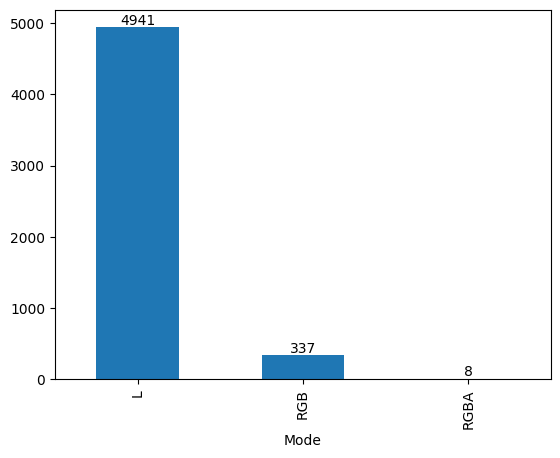

In [13]:
label_counts = image_df['Mode'].value_counts(dropna=False)
label_counts.plot(kind="bar")

for i, value in enumerate(label_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

## Only 8 PNG images have to be converted to JPEG files

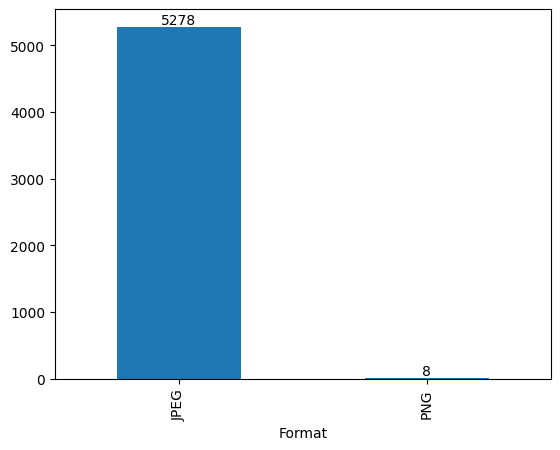

In [14]:
label_counts = image_df['Format'].value_counts(dropna=False)
label_counts.plot(kind="bar")

for i, value in enumerate(label_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

## Imbalanced Datasets attributed to imbalance in pneumonia and normal in=mages

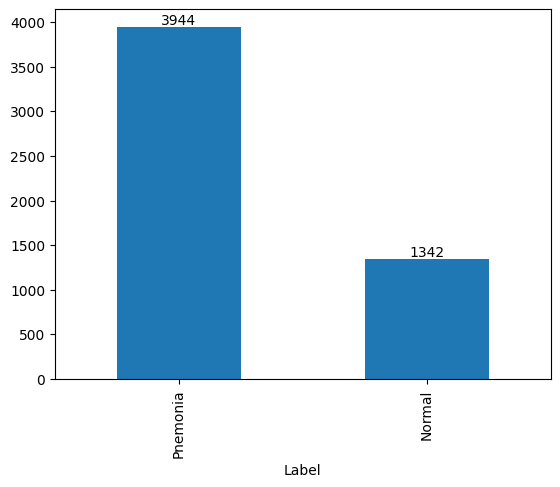

In [15]:
label_counts = image_df['Label'].value_counts(dropna=False)
label_counts.plot(kind="bar")

for i, value in enumerate(label_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

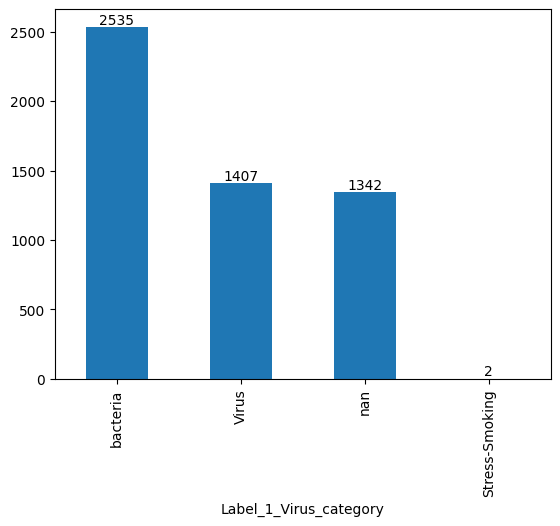

In [16]:
l1_counts = image_df['Label_1_Virus_category'].value_counts(dropna=False)
l1_counts.plot(kind="bar")

for i, value in enumerate(l1_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

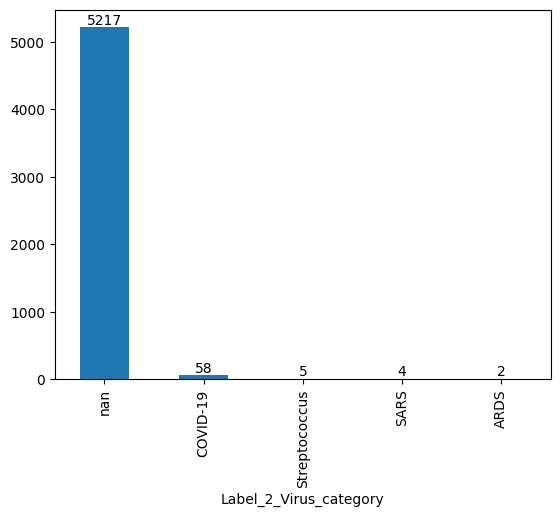

In [17]:
l2_counts = image_df['Label_2_Virus_category'].value_counts(dropna=False)
l2_counts.plot(kind="bar")

for i, value in enumerate(l2_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [18]:
image_df.head()

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category
0,IM-0128-0001.jpeg,1528,1013,L,JPEG,Normal,NaN,NaN
1,IM-0127-0001.jpeg,1974,1306,L,JPEG,Normal,NaN,NaN
2,IM-0125-0001.jpeg,1600,1125,L,JPEG,Normal,NaN,NaN
3,IM-0122-0001.jpeg,1618,1279,L,JPEG,Normal,NaN,NaN
4,IM-0119-0001.jpeg,1810,1434,L,JPEG,Normal,NaN,NaN


In [19]:
image_df[image_df['Label']=='Pnemonia']

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category
1341,person101_virus_188.jpeg,1736,1752,L,JPEG,Pnemonia,Virus,NaN
1342,person101_virus_187.jpeg,1592,1312,L,JPEG,Pnemonia,Virus,NaN
1343,person1019_virus_1708.jpeg,1848,1448,L,JPEG,Pnemonia,Virus,NaN
1344,person1019_virus_1707.jpeg,1752,1408,L,JPEG,Pnemonia,Virus,NaN
1345,person1019_bacteria_2950.jpeg,904,624,L,JPEG,Pnemonia,bacteria,NaN
...,...,...,...,...,...,...,...,...
5281,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,1165,1165,RGB,JPEG,Pnemonia,Virus,COVID-19
5282,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,1170,1161,RGB,JPEG,Pnemonia,Virus,COVID-19
5283,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,1165,1163,RGB,JPEG,Pnemonia,Virus,COVID-19
5284,1-s2.0-S0140673620303706-fx1_lrg.jpg,2563,1148,RGB,JPEG,Pnemonia,Virus,COVID-19


## Pixel Intensity Distribution

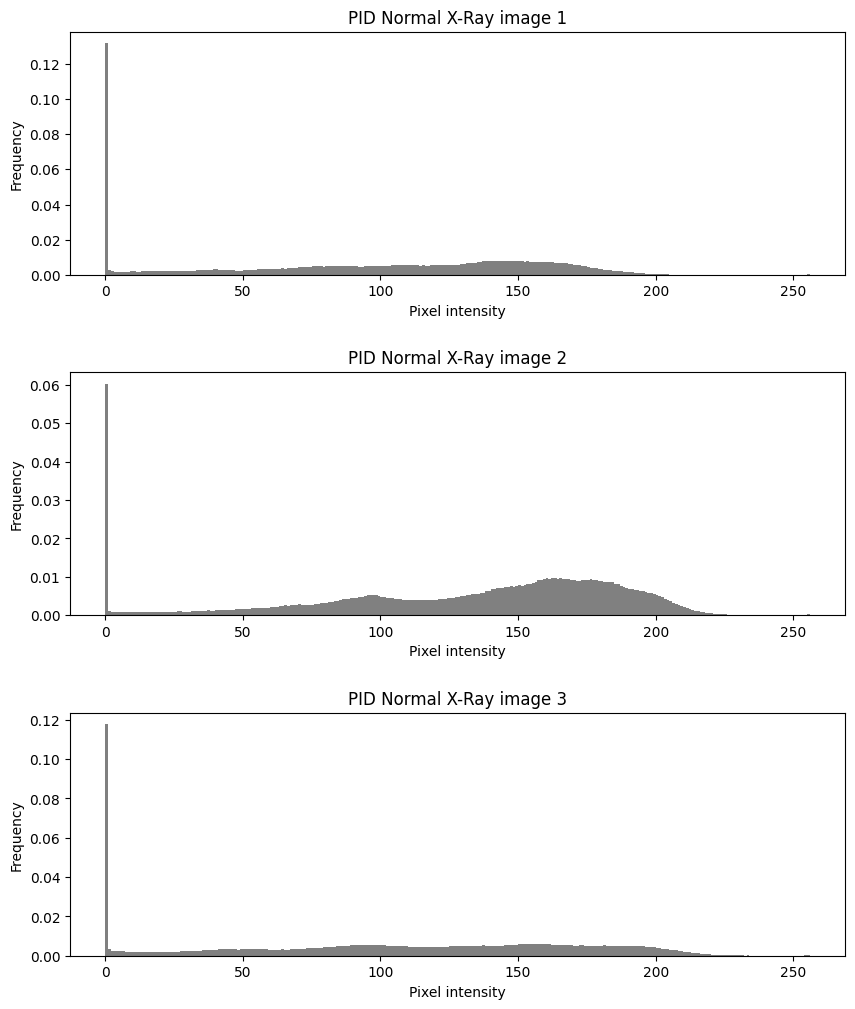

In [20]:
## Normal Image PID

image1 = cv2.imread(os.path.join(train_dir,'IM-0128-0001.jpeg'))
image2 = cv2.imread(os.path.join(train_dir,'IM-0127-0001.jpeg'))
image3 = cv2.imread(os.path.join(train_dir,'IM-0125-0001.jpeg'))
image1_pixels = image1.flatten()
image2_pixels = image2.flatten()
image3_pixels = image3.flatten()

fig,axs = plt.subplots(3,figsize=(10,12))

axs[0].hist(image1_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[0].set_title("PID Normal X-Ray image 1")

axs[1].hist(image2_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[1].set_title("PID Normal X-Ray image 2")

axs[2].hist(image3_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[2].set_title("PID Normal X-Ray image 3")

for ax in axs:
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Frequency")

plt.subplots_adjust(hspace=0.4)

plt.show()

In [21]:
image_df[(image_df['Label']=='Pnemonia') & (image_df['Label_1_Virus_category']=='bacteria')]

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category
1345,person1019_bacteria_2950.jpeg,904,624,L,JPEG,Pnemonia,bacteria,NaN
1347,person1018_bacteria_2949.jpeg,992,760,L,JPEG,Pnemonia,bacteria,NaN
1348,person1017_bacteria_2948.jpeg,1048,716,L,JPEG,Pnemonia,bacteria,NaN
1350,person1016_bacteria_2947.jpeg,968,656,L,JPEG,Pnemonia,bacteria,NaN
1353,person1014_bacteria_2945.jpeg,1366,1044,L,JPEG,Pnemonia,bacteria,NaN
...,...,...,...,...,...,...,...,...
5216,streptococcus-pneumoniae-pneumonia-temporal-ev...,1534,1517,RGB,JPEG,Pnemonia,bacteria,Streptococcus
5217,streptococcus-pneumoniae-pneumonia-temporal-ev...,1534,1517,RGB,JPEG,Pnemonia,bacteria,Streptococcus
5218,streptococcus-pneumoniae-pneumonia-temporal-ev...,1534,1517,RGB,JPEG,Pnemonia,bacteria,Streptococcus
5219,streptococcus-pneumoniae-pneumonia-temporal-ev...,1534,1517,RGB,JPEG,Pnemonia,bacteria,Streptococcus


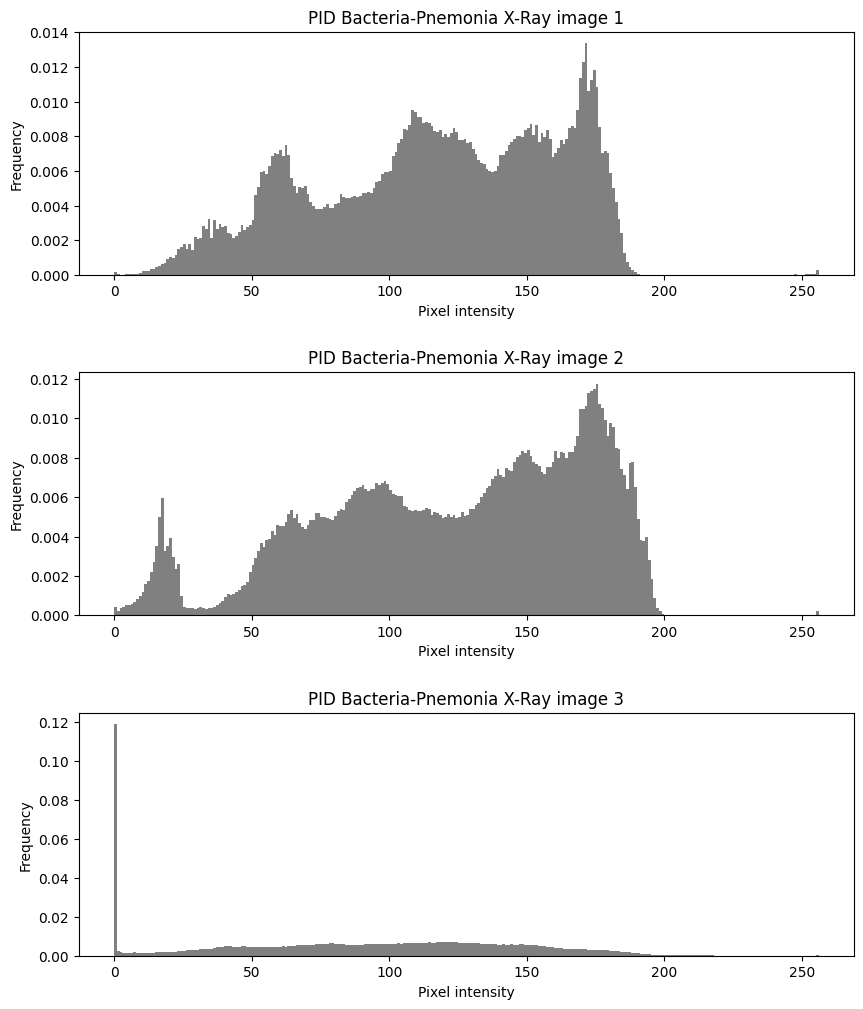

In [22]:
#Pnemonia-bacteria image pid

image1 = cv2.imread(os.path.join(train_dir,'person1019_bacteria_2950.jpeg'))
image2 = cv2.imread(os.path.join(train_dir,'person1018_bacteria_2949.jpeg'))
image3 = cv2.imread(os.path.join(train_dir,'person1017_bacteria_2948.jpeg'))

image1_pixels = image1.flatten()
image2_pixels = image2.flatten()
image3_pixels = image3.flatten()

fig,axs = plt.subplots(3,figsize=(10,12))

axs[0].hist(image1_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[0].set_title("PID Bacteria-Pnemonia X-Ray image 1")

axs[1].hist(image2_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[1].set_title("PID Bacteria-Pnemonia X-Ray image 2")

axs[2].hist(image3_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[2].set_title("PID Bacteria-Pnemonia X-Ray image 3")

for ax in axs:
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Frequency")

plt.subplots_adjust(hspace=0.4)

plt.show()

In [23]:
image_df[(image_df['Label']=='Pnemonia') & (image_df['Label_2_Virus_category']=='COVID-19')].head()

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category
5221,kjr-21-e25-g001-l-a.jpg,424,437,L,JPEG,Pnemonia,Virus,COVID-19
5222,kjr-21-e24-g003-l-a.jpg,425,448,RGB,JPEG,Pnemonia,Virus,COVID-19
5223,kjr-21-e24-g002-l-a.jpg,298,294,RGB,JPEG,Pnemonia,Virus,COVID-19
5224,kjr-21-e24-g001-l-a.jpg,328,237,RGB,JPEG,Pnemonia,Virus,COVID-19
5225,jkms-35-e79-g001-l-c.jpg,416,341,RGB,JPEG,Pnemonia,Virus,COVID-19


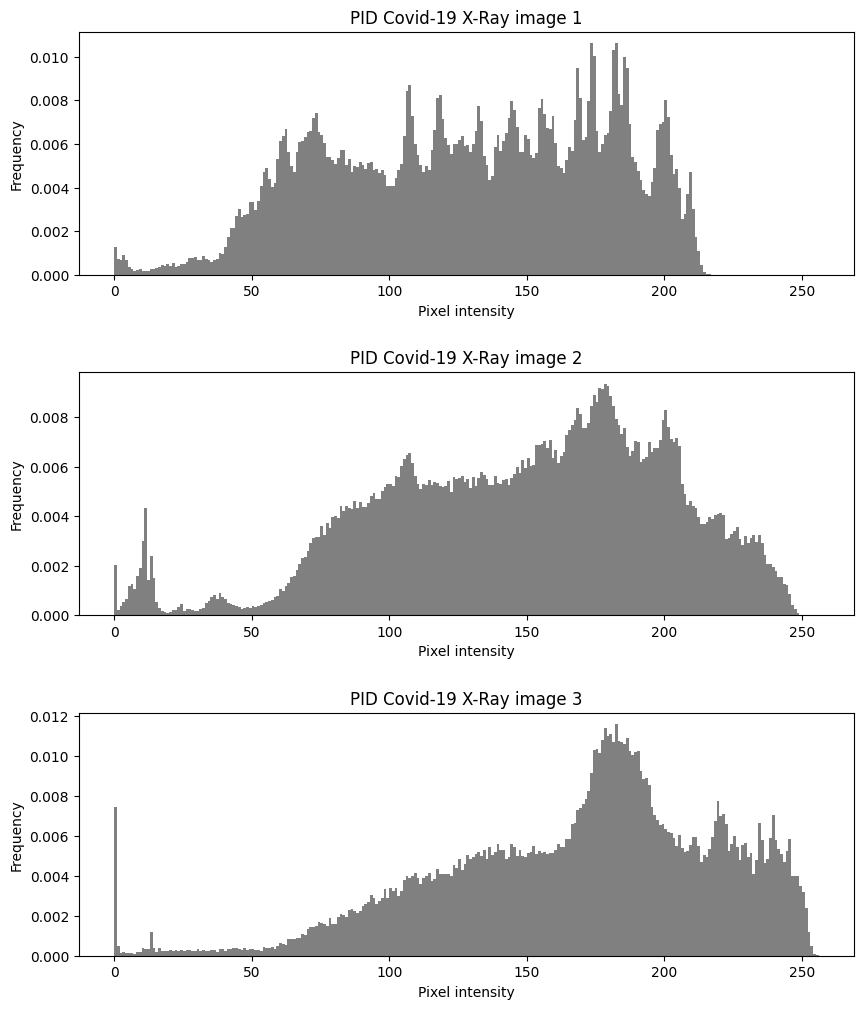

In [24]:
#Covid image pid

image1 = cv2.imread(os.path.join(train_dir,'kjr-21-e25-g001-l-a.jpg'))
image2 = cv2.imread(os.path.join(train_dir,'kjr-21-e24-g003-l-a.jpg'))
image3 = cv2.imread(os.path.join(train_dir,'kjr-21-e24-g002-l-a.jpg'))

image1_pixels = image1.flatten()
image2_pixels = image2.flatten()
image3_pixels = image3.flatten()

fig,axs = plt.subplots(3,figsize=(10,12))

axs[0].hist(image1_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[0].set_title("PID Covid-19 X-Ray image 1")

axs[1].hist(image2_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[1].set_title("PID Covid-19 X-Ray image 2")

axs[2].hist(image3_pixels,bins=256,range=[0,256], density=True,color='gray')
axs[2].set_title("PID Covid-19 X-Ray image 3")

for ax in axs:
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Frequency")

plt.subplots_adjust(hspace=0.4)

plt.show()

## Principal Component Analysis

In [25]:
image_name = image_df['X_ray_image_name'].values.tolist()
img_size = (224,224)
img_flatten_list = []
for image in image_name:
    img = cv2.imread(os.path.join(train_dir,image))
    img_resized = cv2.resize(img,img_size)
    flatten = img_resized.flatten()
    img_flatten_list.append(flatten)

<ipython-input-26-473890079c61>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:,0],pca_result[:,1],c=colors, cmap='coolwarm')


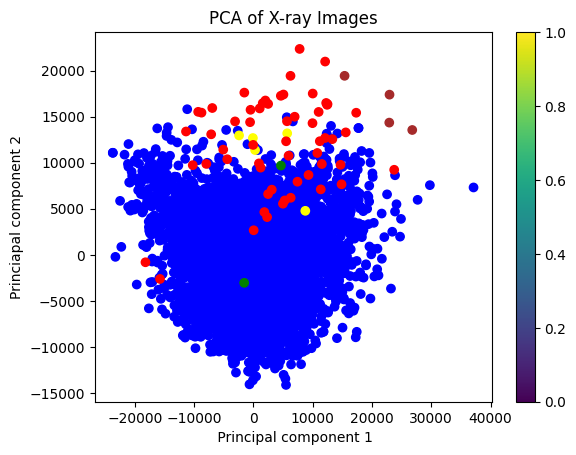

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(img_flatten_list)

unique_labels = image_df['Label_2_Virus_category'].unique().tolist()

unique_labels

color_map = {np.nan: 'blue', 'Streptococcus': 'yellow','COVID-19': 'red','ARDS': 'green','SARS':'brown'}

virus_labels = image_df['Label_2_Virus_category']

colors = [color_map[label] for label in virus_labels]

plt.scatter(pca_result[:,0],pca_result[:,1],c=colors, cmap='coolwarm')
plt.title("PCA of X-ray Images")
plt.xlabel(" Principal component 1")
plt.ylabel("Princiapal component 2")
plt.colorbar()
plt.show()

## Image Statistics

In [27]:
normal_images = image_df[(image_df['Label']=='Normal')]['X_ray_image_name'].values.tolist()
covid_images = image_df[(image_df['Label']=='Pnemonia') & (image_df['Label_2_Virus_category']=='COVID-19')]['X_ray_image_name'].values.tolist()
pneumonia_images = image_df[(image_df['Label']=='Pnemonia') & (image_df['Label_1_Virus_category']=='bacteria')]['X_ray_image_name'].values.tolist()

normal_images_flatten=[]
for image in normal_images:
    img = cv2.imread(os.path.join(train_dir,image))
    img_resized = cv2.resize(img,img_size)
    flatten = img_resized.flatten()
    normal_images_flatten.append(flatten)

covid_images_flatten=[]
for image in covid_images:
    img = cv2.imread(os.path.join(train_dir,image))
    img_resized = cv2.resize(img,img_size)
    flatten = img_resized.flatten()
    covid_images_flatten.append(flatten)

pneumonia_images_flatten=[]
for image in pneumonia_images:
    img = cv2.imread(os.path.join(train_dir,image))
    img_resized = cv2.resize(img,img_size)
    flatten = img_resized.flatten()
    pneumonia_images_flatten.append(flatten)


normal_image_matrix = np.array(normal_images_flatten)
covid_image_matrix = np.array(covid_images_flatten)
pneumonia_image_matrix = np.array(pneumonia_images_flatten)


normal_mean_intensity = [np.mean(normal_image_matrix[i]) for i in range(len(normal_image_matrix))]
normal_std_intensity = [np.std(normal_image_matrix[i]) for i in range(len(normal_image_matrix))]

covid_mean_intensity = [np.mean(covid_image_matrix[i]) for i in range(len(covid_image_matrix))]
covid_std_intensity = [np.std(covid_image_matrix[i]) for i in range(len(covid_image_matrix))]

pnemonia_mean_intensity = [np.mean(pneumonia_image_matrix[i]) for i in range(len(pneumonia_image_matrix))]
pnemonia_std_intensity = [np.std(pneumonia_image_matrix[i]) for i in range(len(pneumonia_image_matrix))]

print("Mean intensity - Normal Cases:", np.mean(normal_mean_intensity))
print("Standard Deviation - Normal Cases:", np.mean(normal_std_intensity))


print("Mean intensity - Covid Cases:", np.mean(covid_mean_intensity))
print("Standard Deviation - Covid Cases:", np.mean(covid_std_intensity))

print("Mean intensity - Pneumonia Cases:", np.mean(pnemonia_mean_intensity))
print("Standard Deviation - Pneumonia Cases:", np.mean(pnemonia_std_intensity))

Mean intensity - Normal Cases: 122.2567222690585
Standard Deviation - Normal Cases: 61.339737977586324
Mean intensity - Covid Cases: 131.431012376664
Standard Deviation - Covid Cases: 52.510093629803116
Mean intensity - Pneumonia Cases: 121.96430370225013
Standard Deviation - Pneumonia Cases: 53.27496371641828


## Edge Analysis

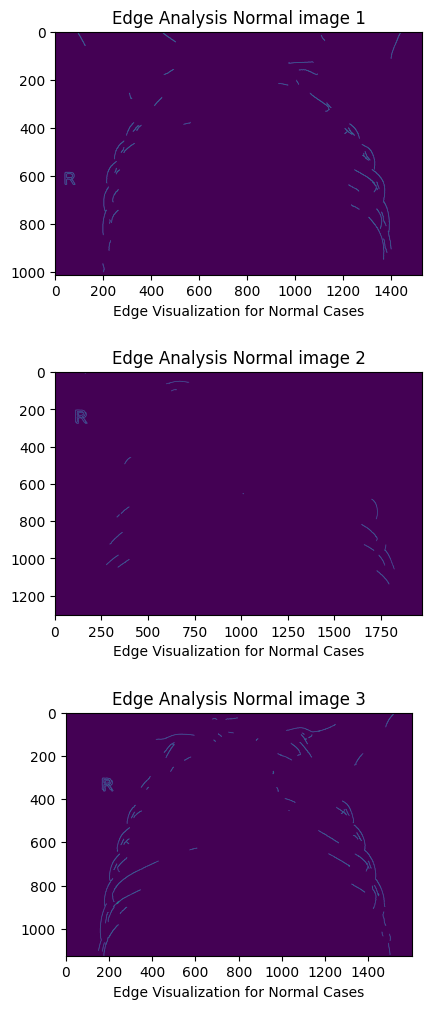

In [28]:
image1 = cv2.imread(os.path.join(train_dir,'IM-0128-0001.jpeg'))
image2 = cv2.imread(os.path.join(train_dir,'IM-0127-0001.jpeg'))
image3 = cv2.imread(os.path.join(train_dir,'IM-0125-0001.jpeg'))

edges1 = cv2.Canny(image1,threshold1= 100,threshold2=200)
edges2 = cv2.Canny(image2,threshold1= 100,threshold2=200)
edges3 = cv2.Canny(image3,threshold1= 100,threshold2=200)



fig,axs = plt.subplots(3,figsize=(10,12))

axs[0].imshow(edges1)
axs[0].set_title("Edge Analysis Normal image 1")

axs[1].imshow(edges2)
axs[1].set_title("Edge Analysis Normal image 2")

axs[2].imshow(edges3)
axs[2].set_title("Edge Analysis Normal image 3")

for ax in axs:
    ax.set_xlabel("Edge Visualization for Normal Cases")


plt.subplots_adjust(hspace=0.4)

plt.show()

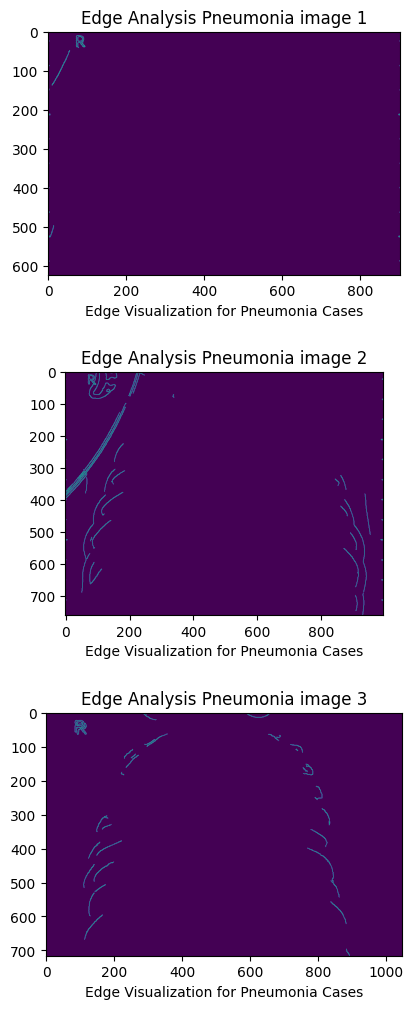

In [29]:
## Pneumonia cases edge analysys

image1 = cv2.imread(os.path.join(train_dir,'person1019_bacteria_2950.jpeg'))
image2 = cv2.imread(os.path.join(train_dir,'person1018_bacteria_2949.jpeg'))
image3 = cv2.imread(os.path.join(train_dir,'person1017_bacteria_2948.jpeg'))

edges1 = cv2.Canny(image1,threshold1= 100,threshold2=200)
edges2 = cv2.Canny(image2,threshold1= 100,threshold2=200)
edges3 = cv2.Canny(image3,threshold1= 100,threshold2=200)



fig,axs = plt.subplots(3,figsize=(10,12))

axs[0].imshow(edges1)
axs[0].set_title("Edge Analysis Pneumonia image 1")

axs[1].imshow(edges2)
axs[1].set_title("Edge Analysis Pneumonia image 2")

axs[2].imshow(edges3)
axs[2].set_title("Edge Analysis Pneumonia image 3")

for ax in axs:
    ax.set_xlabel("Edge Visualization for Pneumonia Cases")


plt.subplots_adjust(hspace=0.4)

plt.show()

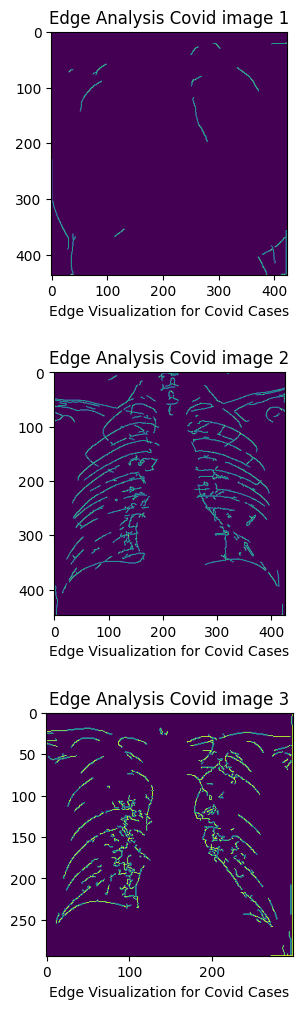

In [30]:
## Covid cases edge analysys

image1 = cv2.imread(os.path.join(train_dir,'kjr-21-e25-g001-l-a.jpg'))
image2 = cv2.imread(os.path.join(train_dir,'kjr-21-e24-g003-l-a.jpg'))
image3 = cv2.imread(os.path.join(train_dir,'kjr-21-e24-g002-l-a.jpg'))

edges1 = cv2.Canny(image1,threshold1= 100,threshold2=200)
edges2 = cv2.Canny(image2,threshold1= 100,threshold2=200)
edges3 = cv2.Canny(image3,threshold1= 100,threshold2=200)



fig,axs = plt.subplots(3,figsize=(10,12))

axs[0].imshow(edges1)
axs[0].set_title("Edge Analysis Covid image 1")

axs[1].imshow(edges2)
axs[1].set_title("Edge Analysis Covid image 2")

axs[2].imshow(edges3)
axs[2].set_title("Edge Analysis Covid image 3")

for ax in axs:
    ax.set_xlabel("Edge Visualization for Covid Cases")


plt.subplots_adjust(hspace=0.4)

plt.show()

## Training the Model

In [31]:
image_df['Class'] = image_df.apply(lambda x:'Normal' if (x['Label']=='Normal') else 'COVID-19' if (x['Label_2_Virus_category']=='COVID-19') \
      #    else   'Streptococcus' if (x['Label_2_Virus_category']=='Streptococcus') else 'ARDS' if (x['Label_2_Virus_category']=='ARDS')  \
      #  else 'SARS' if  (x['Label_2_Virus_category']=='SARS')  else 'bacteria' if ((pd.isna(x['Label_2_Virus_category'])) & (x['Label_1_Virus_category']=='bacteria'))
      #  else 'Virus' if ((pd.isna(x['Label_2_Virus_category'])) & (x['Label_1_Virus_category']=='Virus'))
      else 'Pnemonia' ,axis=1)

In [32]:
trainig_df = image_df[(image_df['Class']=='Normal') | (image_df['Class']=='Pnemonia')]

In [33]:
trainig_df.head()

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category,Class
0,IM-0128-0001.jpeg,1528,1013,L,JPEG,Normal,NaN,NaN,Normal
1,IM-0127-0001.jpeg,1974,1306,L,JPEG,Normal,NaN,NaN,Normal
2,IM-0125-0001.jpeg,1600,1125,L,JPEG,Normal,NaN,NaN,Normal
3,IM-0122-0001.jpeg,1618,1279,L,JPEG,Normal,NaN,NaN,Normal
4,IM-0119-0001.jpeg,1810,1434,L,JPEG,Normal,NaN,NaN,Normal


In [34]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.utils.data import Dataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [35]:
image_list = trainig_df['X_ray_image_name'].values.tolist()
label_list = trainig_df['Class'].values.tolist()

image_label_dict = dict(zip(image_list, label_list))

In [36]:
## Data Augmentation
image_transform = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=35),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.RandomAffine(degrees=0, translate=(0.2,0.2)),
    transforms.Normalize(mean=[0.485],std=[0.229])

    ])

class CustomXrayDataset(Dataset):
  def __init__(self,image_label_dict,train_dir, transforms=None):
    self.image_label_dict = image_label_dict
    self.train_dir = train_dir
    self.transforms = image_transform
    self.image_list = list(image_label_dict.keys())
    #self.label_list = list(image_label_dict.values())

  def __len__(self):
    return len(self.image_list)

  def label_encoding(self, label):
      label_dict = {
          'Normal':0,
          # 'COVID-19':1,
           'Pnemonia':1

      }
      return label_dict[label]

  def __getitem__(self,idx):
      image_name = self.image_list[idx]

      image = Image.open(os.path.join(self.train_dir,image_name))
      label = self.image_label_dict[image_name]
      label = self.label_encoding(label)
      if self.transforms:
        image = self.transforms(image)
      return image,label





In [37]:
minority_class = ['COVID-19']

majority_class = ['Normal','Pnemonia']

In [38]:
def get_oversample(minority_class_name,num_samples):
  minority_class_images = trainig_df[image_df['Class']==minority_class_name]['X_ray_image_name'].values.tolist()
  syn_image_per_sample = num_samples // len(minority_class_images)
  minority_df = pd.DataFrame(columns=trainig_df.columns)
  for image in minority_class_images:
    img = Image.open(os.path.join(train_dir,image))
    for i in range(syn_image_per_sample):
      syn_img = image_transform(img)
      syn_img = transforms.ToPILImage()(syn_img)
      syn_img.save(os.path.join(train_dir,f'syn_{i}_{image}'))
      minority_df = pd.concat([minority_df, pd.DataFrame([[f'syn_{i}_{image}',300,300,'L','JPEG',np.nan,np.nan,np.nan,minority_class_name]], columns=minority_df.columns)], ignore_index=True)

  return minority_df

In [40]:
# min_balanced_df = []
# for class_name in minority_class:
#   df = get_oversample(class_name,300)

#   min_balanced_df.append(df)
# min_balanced_df = pd.concat(min_balanced_df)

# min_balanced_df

In [41]:
from sklearn.utils import resample

majority_downsampled_dfs = []

for class_label in majority_class:
    class_df = trainig_df[image_df['Class'] == class_label]
    downsampled_df = resample(class_df,
                              replace=False,
                              n_samples=400,
                              random_state=42)  # Downsample to target_size
    majority_downsampled_dfs.append(downsampled_df)

balanced_df = pd.concat(majority_downsampled_dfs)

balanced_df

<ipython-input-41-a0f44fb050ce>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_df = trainig_df[image_df['Class'] == class_label]
<ipython-input-41-a0f44fb050ce>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_df = trainig_df[image_df['Class'] == class_label]


,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category,Class
802,NORMAL2-IM-0686-0001.jpeg,1512,1325,L,JPEG,Normal,NaN,NaN,Normal
548,IM-0739-0001.jpeg,1114,815,L,JPEG,Normal,NaN,NaN,Normal
570,IM-0712-0001.jpeg,1882,1557,L,JPEG,Normal,NaN,NaN,Normal
430,IM-0604-0001.jpeg,1724,1353,L,JPEG,Normal,NaN,NaN,Normal
259,IM-0466-0001.jpeg,1600,1264,L,JPEG,Normal,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...
3869,person399_virus_793.jpeg,1312,800,L,JPEG,Pnemonia,Virus,NaN,Pnemonia
4455,person728_bacteria_2630.jpeg,1000,528,L,JPEG,Pnemonia,bacteria,NaN,Pnemonia
1755,person1209_bacteria_3161.jpeg,1576,1376,L,JPEG,Pnemonia,bacteria,NaN,Pnemonia
3513,person357_virus_734.jpeg,1312,1112,L,JPEG,Pnemonia,Virus,NaN,Pnemonia


In [43]:
# min_balanced_df['Class'].value_counts(),
balanced_df['Class'].value_counts()

,count
Class,
Normal,400
Pnemonia,400


In [44]:
# new_df = pd.concat([balanced_df , min_balanced_df])
new_df = pd.concat([balanced_df])
new_df

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category,Class
802,NORMAL2-IM-0686-0001.jpeg,1512,1325,L,JPEG,Normal,NaN,NaN,Normal
548,IM-0739-0001.jpeg,1114,815,L,JPEG,Normal,NaN,NaN,Normal
570,IM-0712-0001.jpeg,1882,1557,L,JPEG,Normal,NaN,NaN,Normal
430,IM-0604-0001.jpeg,1724,1353,L,JPEG,Normal,NaN,NaN,Normal
259,IM-0466-0001.jpeg,1600,1264,L,JPEG,Normal,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...
3869,person399_virus_793.jpeg,1312,800,L,JPEG,Pnemonia,Virus,NaN,Pnemonia
4455,person728_bacteria_2630.jpeg,1000,528,L,JPEG,Pnemonia,bacteria,NaN,Pnemonia
1755,person1209_bacteria_3161.jpeg,1576,1376,L,JPEG,Pnemonia,bacteria,NaN,Pnemonia
3513,person357_virus_734.jpeg,1312,1112,L,JPEG,Pnemonia,Virus,NaN,Pnemonia


In [45]:
image_list = new_df['X_ray_image_name'].values.tolist()
label_list = new_df['Class'].values.tolist()

image_label_dict = dict(zip(image_list, label_list))

In [46]:
dataset = CustomXrayDataset(image_label_dict, train_dir, transforms=image_transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size,val_size])



train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=1)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=1)

In [47]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class XrayCNN(nn.Module):
  def __init__(self,num_classes=2):
    super(XrayCNN,self).__init__()

    #convolution layers
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
    self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
    self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, padding=1)

    #pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    #connected layers
    self.fc1 = nn.Linear(512*9*9,1024)
    self.fc2 = nn.Linear(1024,512)
    self.fc3 = nn.Linear(512,num_classes)

    #dropout
    self.dropout = nn.Dropout(0.25)

    self.bn1 = nn.BatchNorm2d(32)
    self.bn2 = nn.BatchNorm2d(64)
    self.bn3 = nn.BatchNorm2d(128)
    self.bn4 = nn.BatchNorm2d(256)
    self.bn5 = nn.BatchNorm2d(512)

  def forward(self,x):
   x = self.pool(F.relu(self.bn1(self.conv1(x))))
   x = self.pool(F.relu(self.bn2(self.conv2(x))))
   x = self.pool(F.relu(self.bn3(self.conv3(x))))
   x = self.pool(F.relu(self.bn4(self.conv4(x))))
   x = self.pool(F.relu(self.bn5(self.conv5(x))))

  #  print(x.shape)

   size = x.size()[1:]
   num_features = 1
   for s in size:
       num_features *= s

   x = x.view(-1,num_features)

   x = F.relu(self.fc1(x))
   x = self.dropout(x)
   x = F.relu(self.fc2(x))
   x = self.dropout(x)

   x = self.fc3(x)

   return x

num_classes = 2
device = torch.device('cuda' if torch.cuda.is_available() else  'cpu' )
model = XrayCNN(num_classes=num_classes).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [48]:
!pip install tensorboard

In [49]:
n_epochs = 20
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import ReduceLROnPlateau
writer = SummaryWriter('experiment_1')

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

best_val_loss = float('inf')
early_stopping_counter = 0
early_stopping_patience = 3

for epoch in range(n_epochs):
  print(f"starting {epoch}")
  model.train()
  running_loss = 0.0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader)}")

  #validation loop
  true_labels = []
  pred_labels = []
  val_loss = 0.0

  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for images, labels in val_loader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      loss = criterion(outputs, labels)
      val_loss += loss.item()

      _, predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      true_labels.extend(labels.cpu().numpy())
      pred_labels.extend(predicted.cpu().numpy())

  avg_val_loss = val_loss / len(val_loader)
  scheduler.step(avg_val_loss)
  print(f'Validation Accuracy: {100 * correct / total:.2f}%')

  if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0

        model_save_path = f'best_model_epoch_{epoch+1}.pth'
        torch.save(model.state_dict(), model_save_path)

  else: # Corrected indentation for the else statement
    early_stopping_counter += 1
    if early_stopping_counter >= early_stopping_patience:
      print(f"Early stopping at epoch {epoch+1}")
      break

  accuracy = accuracy_score(true_labels, pred_labels)
  precision = precision_score(true_labels, pred_labels, average='weighted')
  recall = recall_score(true_labels, pred_labels, average='weighted')
  f1 = f1_score(true_labels, pred_labels, average='weighted')

  print(f'Accuracy: {accuracy:.4f}')
  writer.add_scalar("Accuracy: ",accuracy, epoch)
  print(f'Precision: {precision:.4f}')
  writer.add_scalar("Precision: ",precision, epoch)
  print(f'Recall: {recall:.4f}')
  writer.add_scalar("Recall: ",recall, epoch)
  print(f'F1 Score: {f1:.4f}')
  writer.add_scalar("F1 Score: ",f1, epoch)

  model_save_path = f'model_epoch_{epoch+1}.pth'
  torch.save(model.state_dict(), model_save_path)
  print(f'Model saved at {model_save_path}')

  cm = confusion_matrix(true_labels, pred_labels)
  print(f'Confusion Matrix:\n{cm}')

writer.close()

starting 0


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/20], Loss: 3.6273988246917725
Validation Accuracy: 55.00%
Accuracy: 0.5500
Precision: 0.6015
Recall: 0.5500
F1 Score: 0.4225
Model saved at model_epoch_1.pth
Confusion Matrix:
[[ 4 70]
 [ 2 84]]
starting 1


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [2/20], Loss: 0.7503312349319458
Validation Accuracy: 75.62%
Accuracy: 0.7562
Precision: 0.7646
Recall: 0.7562
F1 Score: 0.7514
Model saved at model_epoch_2.pth
Confusion Matrix:
[[46 28]
 [11 75]]
starting 2


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [3/20], Loss: 0.5529039680957795
Validation Accuracy: 77.50%
Accuracy: 0.7750
Precision: 0.7934
Recall: 0.7750
F1 Score: 0.7681
Model saved at model_epoch_3.pth
Confusion Matrix:
[[45 29]
 [ 7 79]]
starting 3


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [4/20], Loss: 0.4492030568420887
Validation Accuracy: 80.62%
Accuracy: 0.8063
Precision: 0.8559
Recall: 0.8063
F1 Score: 0.8025
Model saved at model_epoch_4.pth
Confusion Matrix:
[[73  1]
 [30 56]]
starting 4


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [5/20], Loss: 0.43254355862736704
Validation Accuracy: 85.00%
Accuracy: 0.8500
Precision: 0.8808
Recall: 0.8500
F1 Score: 0.8487
Model saved at model_epoch_5.pth
Confusion Matrix:
[[73  1]
 [23 63]]
starting 5


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [6/20], Loss: 0.444806794822216
Validation Accuracy: 87.50%
Accuracy: 0.8750
Precision: 0.8820
Recall: 0.8750
F1 Score: 0.8751
Model saved at model_epoch_6.pth
Confusion Matrix:
[[69  5]
 [15 71]]
starting 6


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [7/20], Loss: 0.39537394419312477
Validation Accuracy: 83.12%
Accuracy: 0.8313
Precision: 0.8446
Recall: 0.8313
F1 Score: 0.8279
Model saved at model_epoch_7.pth
Confusion Matrix:
[[52 22]
 [ 5 81]]
starting 7


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [8/20], Loss: 0.38435088023543357
Validation Accuracy: 86.25%
Accuracy: 0.8625
Precision: 0.8793
Recall: 0.8625
F1 Score: 0.8622
Model saved at model_epoch_8.pth
Confusion Matrix:
[[71  3]
 [19 67]]
starting 8


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [9/20], Loss: 0.342268992215395
Validation Accuracy: 86.88%
Accuracy: 0.8688
Precision: 0.8802
Recall: 0.8688
F1 Score: 0.8687
Model saved at model_epoch_9.pth
Confusion Matrix:
[[70  4]
 [17 69]]
starting 9


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [10/20], Loss: 0.39794152453541753
Validation Accuracy: 83.75%
Accuracy: 0.8375
Precision: 0.8380
Recall: 0.8375
F1 Score: 0.8376
Model saved at model_epoch_10.pth
Confusion Matrix:
[[62 12]
 [14 72]]
starting 10


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [11/20], Loss: 0.36117428094148635
Validation Accuracy: 70.00%
Early stopping at epoch 11


## Testing the Model

In [50]:
test_df = metadata[metadata['Dataset_type']=='TEST']

test_df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,Normal,TEST,NaN,NaN
5287,5310,IM-0019-0001.jpeg,Normal,TEST,NaN,NaN
5288,5311,IM-0017-0001.jpeg,Normal,TEST,NaN,NaN
5289,5312,IM-0016-0001.jpeg,Normal,TEST,NaN,NaN
5290,5313,IM-0015-0001.jpeg,Normal,TEST,NaN,NaN


In [51]:
test_df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,Normal,TEST,NaN,NaN
5287,5310,IM-0019-0001.jpeg,Normal,TEST,NaN,NaN
5288,5311,IM-0017-0001.jpeg,Normal,TEST,NaN,NaN
5289,5312,IM-0016-0001.jpeg,Normal,TEST,NaN,NaN
5290,5313,IM-0015-0001.jpeg,Normal,TEST,NaN,NaN


In [52]:
test_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

In [53]:

test_images_list = test_df['X_ray_image_name'].values.tolist()

test_image_df = pd.DataFrame(columns=['X_ray_image_name','Image_Width','Image_Height','Mode','Format','Label','Label_1_Virus_category','Label_2_Virus_category'])




#writing image metadata to a dictionary
image_dict = {}
n=0
for file in test_images_list:


    img=Image.open(os.path.join(test_dir,file))

    test_image_df.loc[n] = [file,img.size[0],img.size[1],img.mode,img.format,\
                       metadata[metadata['X_ray_image_name']==file].Label.values[0],\
                       metadata[metadata['X_ray_image_name']==file].Label_1_Virus_category.values[0],\
                       metadata[metadata['X_ray_image_name']==file].Label_2_Virus_category.values[0]]
    n+=1


In [54]:
test_image_df

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category
0,IM-0021-0001.jpeg,2624,1893,L,JPEG,Normal,NaN,NaN
1,IM-0019-0001.jpeg,1917,1432,L,JPEG,Normal,NaN,NaN
2,IM-0017-0001.jpeg,1984,1559,L,JPEG,Normal,NaN,NaN
3,IM-0016-0001.jpeg,2498,2057,L,JPEG,Normal,NaN,NaN
4,IM-0015-0001.jpeg,1803,1238,L,JPEG,Normal,NaN,NaN
...,...,...,...,...,...,...,...,...
619,person1637_virus_2834.jpeg,1080,672,L,JPEG,Pnemonia,Virus,NaN
620,person1635_virus_2831.jpeg,1056,840,L,JPEG,Pnemonia,Virus,NaN
621,person1634_virus_2830.jpeg,1336,1024,L,JPEG,Pnemonia,Virus,NaN
622,person1633_virus_2829.jpeg,1120,528,L,JPEG,Pnemonia,Virus,NaN


In [55]:
test_image_df['Class'] = test_image_df.apply(lambda x:'Normal' if (x['Label']=='Normal') \
                                   else 'COVID-19' if (x['Label_2_Virus_category']=='COVID-19') \

      else 'Pnemonia' ,axis=1)

In [56]:
test_image_df.head()

,X_ray_image_name,Image_Width,Image_Height,Mode,Format,Label,Label_1_Virus_category,Label_2_Virus_category,Class
0,IM-0021-0001.jpeg,2624,1893,L,JPEG,Normal,NaN,NaN,Normal
1,IM-0019-0001.jpeg,1917,1432,L,JPEG,Normal,NaN,NaN,Normal
2,IM-0017-0001.jpeg,1984,1559,L,JPEG,Normal,NaN,NaN,Normal
3,IM-0016-0001.jpeg,2498,2057,L,JPEG,Normal,NaN,NaN,Normal
4,IM-0015-0001.jpeg,1803,1238,L,JPEG,Normal,NaN,NaN,Normal


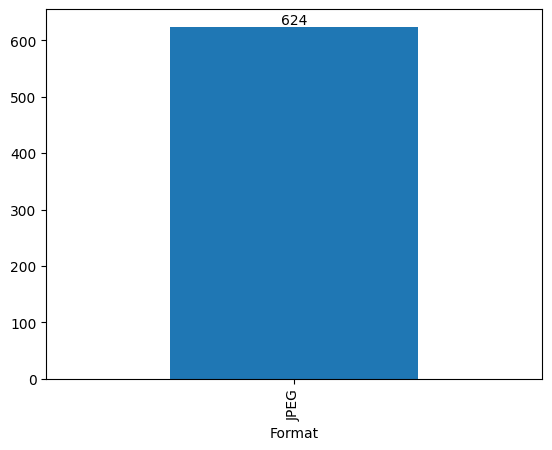

In [57]:
label_counts = test_image_df['Format'].value_counts(dropna=False)
label_counts.plot(kind="bar")

for i, value in enumerate(label_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

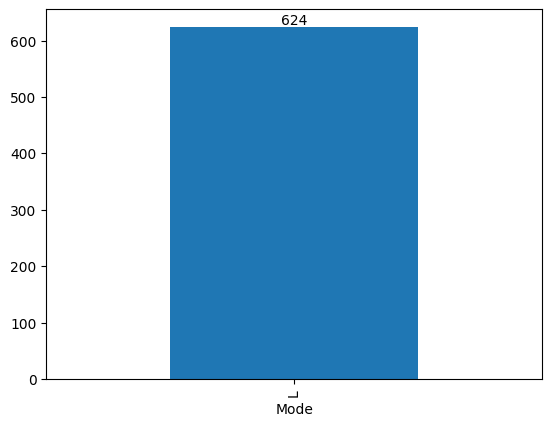

In [58]:
label_counts = test_image_df['Mode'].value_counts(dropna=False)
label_counts.plot(kind="bar")

for i, value in enumerate(label_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [59]:
# import torch
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader, WeightedRandomSampler
# from torch.utils.data import Dataset, random_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [60]:
test_image_transform = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485],std=[0.229])
    ])

In [61]:
# import torch.nn as nn
# import torch.nn.functional as F
# class XrayCNN(nn.Module):
#   def __init__(self,num_classes=3):
#     super(XrayCNN,self).__init__()

#     #convolution layers
#     self.conv1 = nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
#     self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
#     self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1)
#     self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1)
#     self.conv5 = nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3, padding=1)

#     #pooling layer
#     self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#     #connected layers
#     self.fc1 = nn.Linear(512*7*7,1024)
#     self.fc2 = nn.Linear(1024,512)
#     self.fc3 = nn.Linear(512,num_classes)

#     #dropout
#     self.dropout = nn.Dropout(0.25)

#     self.bn1 = nn.BatchNorm2d(32)
#     self.bn2 = nn.BatchNorm2d(64)
#     self.bn3 = nn.BatchNorm2d(128)
#     self.bn4 = nn.BatchNorm2d(256)
#     self.bn5 = nn.BatchNorm2d(512)

#   def forward(self,x):
#    x = self.pool(F.relu(self.bn1(self.conv1(x))))
#    x = self.pool(F.relu(self.bn2(self.conv2(x))))
#    x = self.pool(F.relu(self.bn3(self.conv3(x))))
#    x = self.pool(F.relu(self.bn4(self.conv4(x))))
#    x = self.pool(F.relu(self.bn5(self.conv5(x))))

#    size = x.size()[1:]
#    num_features = 1
#    for s in size:
#        num_features *= s

#    x = x.view(-1,num_features)

#    x = F.relu(self.fc1(x))
#    x = self.dropout(x)
#    x = F.relu(self.fc2(x))
#    x = self.dropout(x)

#    x = self.fc3(x)

#    return x

In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = XrayCNN(num_classes=2)
model.to(device)
model.load_state_dict(torch.load('best_model_epoch_8.pth',map_location=device))
model.eval()


<ipython-input-66-ccd6cbc10301>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_epoch_8.pth',map_location=device))


XrayCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=41472, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNor

In [70]:
test_images = test_image_df['X_ray_image_name']

for image in test_images:
    img = Image.open(os.path.join(test_dir,image))
    img = test_image_transform(img)
    img = img.unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img)
        _, predicted_class = torch.max(output, 1)
        print(output,"++++" ,torch.max(output, 1))
        test_image_df['Predicted_model_8'] = predicted_class.item()


tensor([[-0.7846,  0.6555]]) ++++ torch.return_types.max(
values=tensor([0.6555]),
indices=tensor([1]))
tensor([[ 0.6260, -0.2096]]) ++++ torch.return_types.max(
values=tensor([0.6260]),
indices=tensor([0]))
tensor([[-0.8541,  0.7499]]) ++++ torch.return_types.max(
values=tensor([0.7499]),
indices=tensor([1]))
tensor([[ 1.0484, -0.2729]]) ++++ torch.return_types.max(
values=tensor([1.0484]),
indices=tensor([0]))
tensor([[ 0.3611, -0.1306]]) ++++ torch.return_types.max(
values=tensor([0.3611]),
indices=tensor([0]))
tensor([[ 1.3014, -0.4458]]) ++++ torch.return_types.max(
values=tensor([1.3014]),
indices=tensor([0]))
tensor([[-0.5816,  0.6295]]) ++++ torch.return_types.max(
values=tensor([0.6295]),
indices=tensor([1]))
tensor([[ 1.2667, -0.6159]]) ++++ torch.return_types.max(
values=tensor([1.2667]),
indices=tensor([0]))
tensor([[ 0.6562, -0.2129]]) ++++ torch.return_types.max(
values=tensor([0.6562]),
indices=tensor([0]))
tensor([[0.1562, 0.0016]]) ++++ torch.return_types.max(
values=t

In [68]:
test_image_df['Predicted_model_8'].value_counts()

,count
Predicted_model_8,
1,624


In [65]:
test_image_df['Class'].value_counts()

,count
Class,
Pnemonia,390
Normal,234
